## Plotting options 

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import pandas as pd
import datashader as ds
from datashader import transfer_functions as tf
from datashader.colors import Greys9, inferno, viridis
from datashader.utils import export_image
from functools import partial
background = "white"

In [2]:
img_map = partial(export_image, export_path="circular_maps", background=background)

### Logistic map

In [3]:
def mapa_logistico(r, x):
    return r * x * (1 - x)

### Circular representation

In [4]:
def circular_map(r1, theta, dtheta, radius, iterar):
    r = np.array([r1])
    x = np.array([1e-5])
    x_list, y_list = [], []
    for i in range(iterar):
        x = mapa_logistico(r, x)
        X = x * radius * np.cos(theta)
        Y = x * radius * np.sin(theta)
        x_list.append(X[0])
        y_list.append(Y[0])
        theta = theta + dtheta
    return x_list, y_list

### Domain

In [5]:
x_list, y_list = circular_map(3.99, 0, 0.2, 1, 10000000)
d = {'r': x_list, 'x': y_list}
df1 = pd.DataFrame(d)

### Density `datashader`  plot 

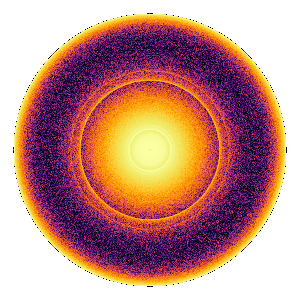

In [6]:
cvs1 = ds.Canvas(plot_width=300, plot_height=300, x_range=(-1.1,1.1), y_range=(-1.1,1.1))
agg1 = cvs1.points(df1, 'r', 'x')
img = tf.shade(agg1, cmap = inferno, how='eq_hist')
img_map(img,"map_chaos")

In [7]:
background = "white"
img_map = partial(export_image, export_path="circular_maps", background=background)

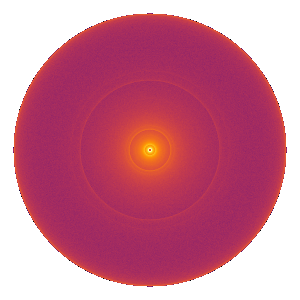

In [8]:
cvs1 = ds.Canvas(plot_width=300, plot_height=300, x_range=(-1.1,1.1), y_range=(-1.1,1.1))
agg1 = cvs1.points(df1, 'r', 'x')
img = tf.shade(agg1, cmap = inferno, how='log')
img_map(img,"map_chaos1")

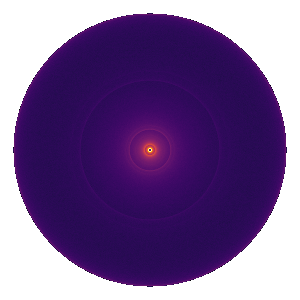

In [9]:
cvs1 = ds.Canvas(plot_width=300, plot_height=300, x_range=(-1.1,1.1), y_range=(-1.1,1.1))
agg1 = cvs1.points(df1, 'r', 'x')
img = tf.shade(agg1, cmap = inferno, how='cbrt')
img_map(img,"map_chaos2")

In [10]:
tf.shade?

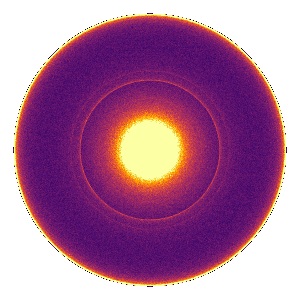

In [20]:
cvs1 = ds.Canvas(plot_width=300, plot_height=300, x_range=(-1.1,1.1), y_range=(-1.1,1.1))
agg1 = cvs1.points(df1, 'r', 'x')
img = tf.shade(agg1, cmap = inferno, how='linear', span = [0,350])
img_map(img,"map_chaos3")

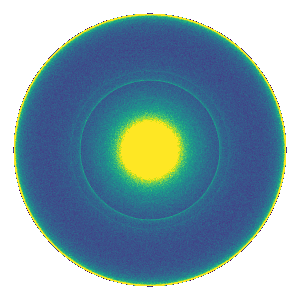

In [19]:
cvs1 = ds.Canvas(plot_width=300, plot_height=300, x_range=(-1.1,1.1), y_range=(-1.1,1.1))
agg1 = cvs1.points(df1, 'r', 'x')
img = tf.shade(agg1, cmap = viridis, how='linear', span = [0,350])
img_map(img,"map_chaos4")

### Packages, version control

In [12]:
print("--"*25)
print("... numpy == ", np.__version__)
print("... matplotlib == ", mpl.__version__)
print("... pandas == ", pd.__version__)
print("... datashader == ", ds.__version__)
print("__"*25)

--------------------------------------------------
... numpy ==  1.14.0
... matplotlib ==  2.1.2
... pandas ==  0.22.0
... datashader ==  0.6.5
__________________________________________________
